In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [4]:
AI = pd.read_csv('/content/AI.csv')

In [5]:
AI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
print(AI.shape)
print(AI.columns)
print(AI.dtypes)
print(AI.head())

(15000, 19)
Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')
job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
ben

In [7]:
print(AI.isnull().sum())

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [8]:
AI = AI.dropna()

In [9]:
AI = AI.drop_duplicates()

job_id
AI15000    1
AI00001    1
AI00002    1
AI00003    1
AI00004    1
          ..
AI00028    1
AI00029    1
AI00030    1
AI00031    1
AI00032    1
Name: count, Length: 15000, dtype: int64


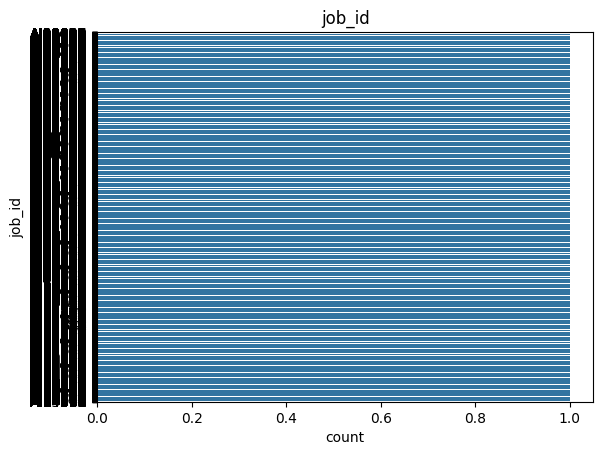

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64


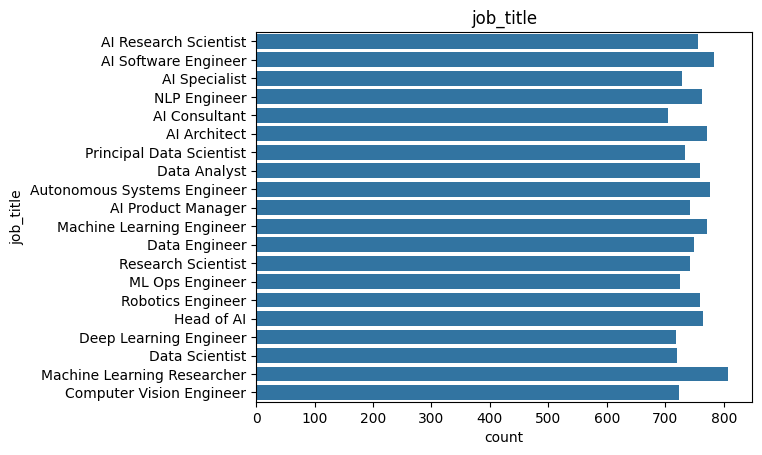

salary_currency
USD    11957
EUR     2314
GBP      729
Name: count, dtype: int64


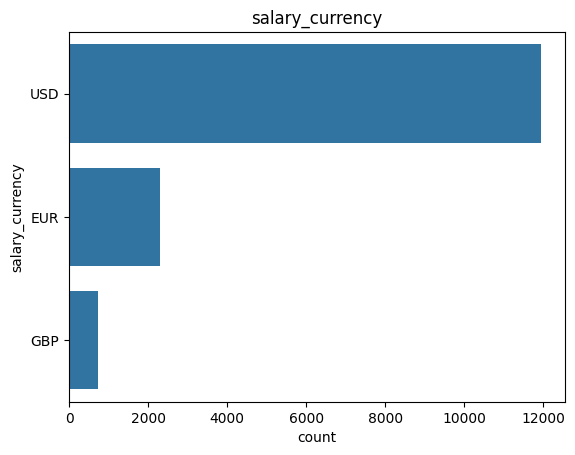

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64


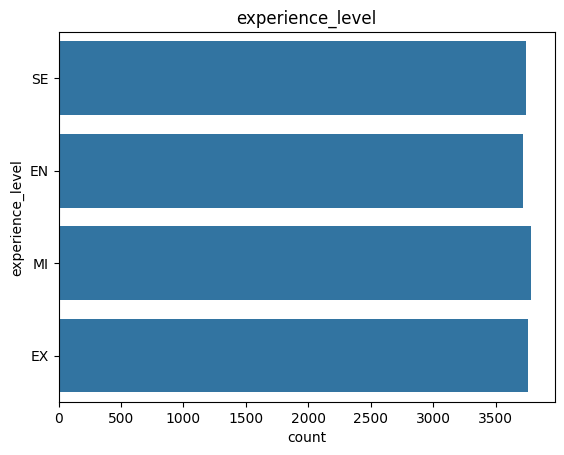

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64


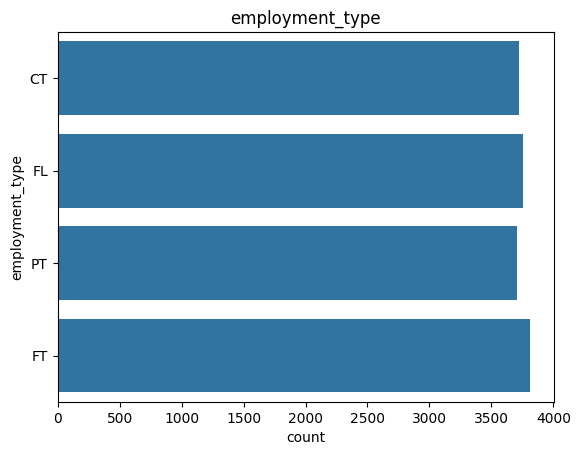

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64


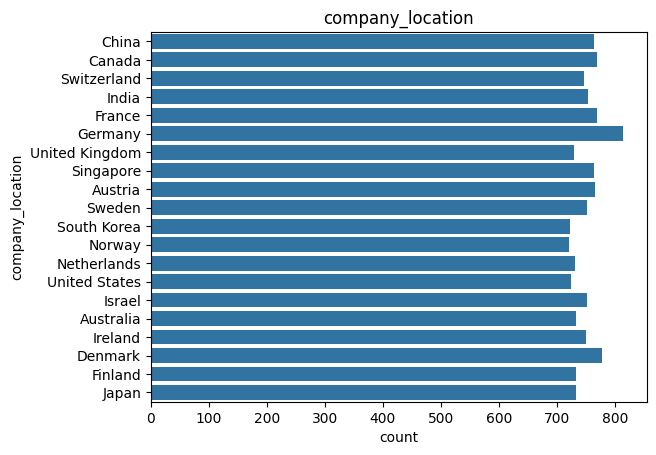

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64


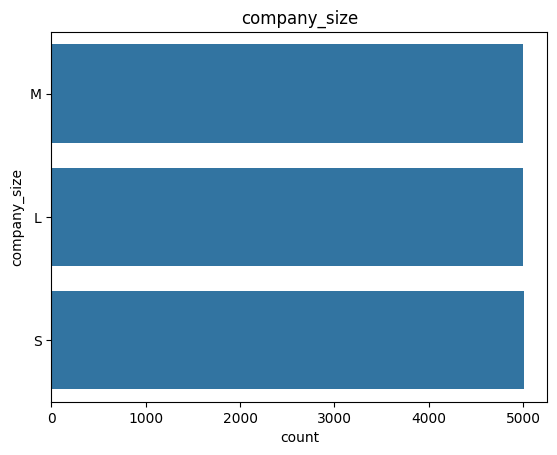

employee_residence
Sweden            790
France            781
Denmark           777
Austria           776
India             772
Germany           769
South Korea       763
Canada            762
China             761
Netherlands       758
United Kingdom    750
Switzerland       748
Ireland           740
Singapore         740
Israel            731
Australia         730
Norway            726
United States     716
Finland           710
Japan             700
Name: count, dtype: int64


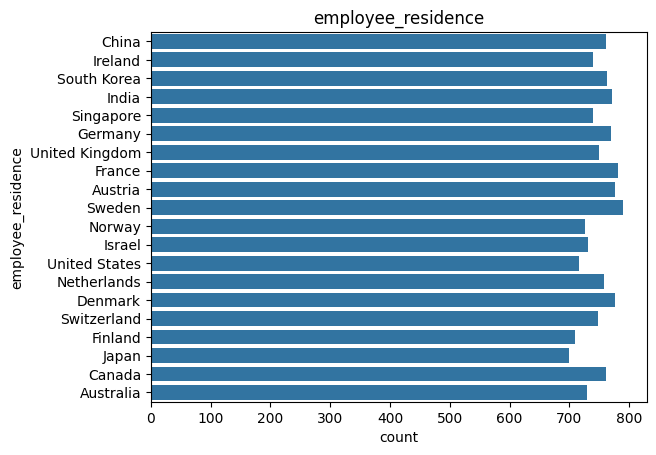

required_skills
Python, TensorFlow, PyTorch                       17
Python, TensorFlow, Tableau                        9
Python, TensorFlow, Data Visualization             7
Python, TensorFlow, Linux                          7
Python, TensorFlow, MLOps                          7
                                                  ..
Java, Spark, R                                     1
Statistics, Hadoop, Spark, R                       1
Mathematics, Python, Scala                         1
Data Visualization, Hadoop, GCP, TensorFlow, R     1
Hadoop, SQL, PyTorch, Data Visualization           1
Name: count, Length: 13663, dtype: int64


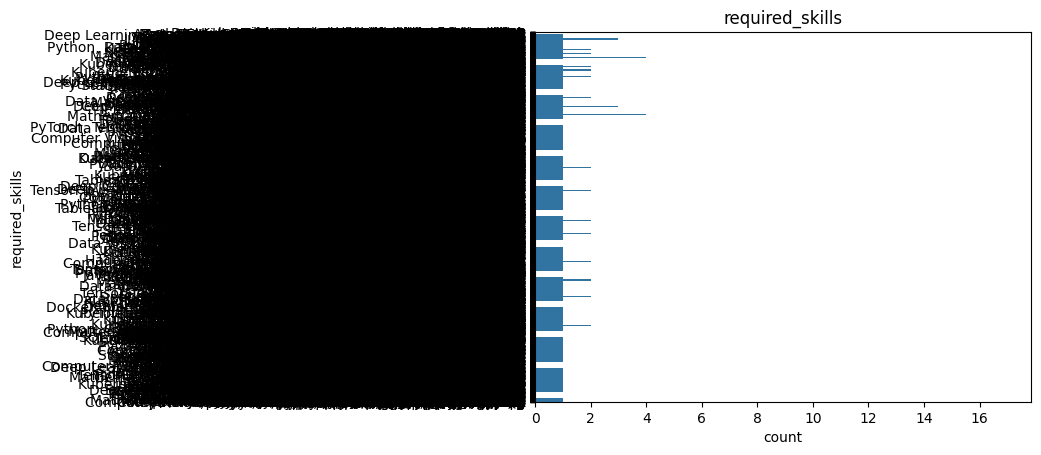

education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64


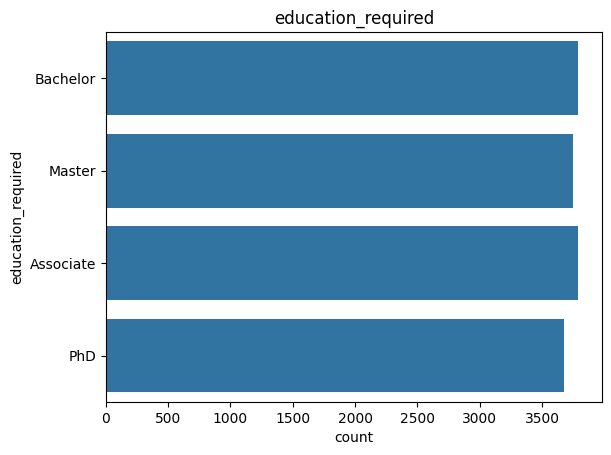

industry
Retail                1063
Media                 1045
Automotive            1020
Consulting            1020
Technology            1011
Real Estate           1007
Government             998
Transportation         997
Telecommunications     997
Healthcare             997
Finance                984
Energy                 976
Gaming                 967
Manufacturing          962
Education              956
Name: count, dtype: int64


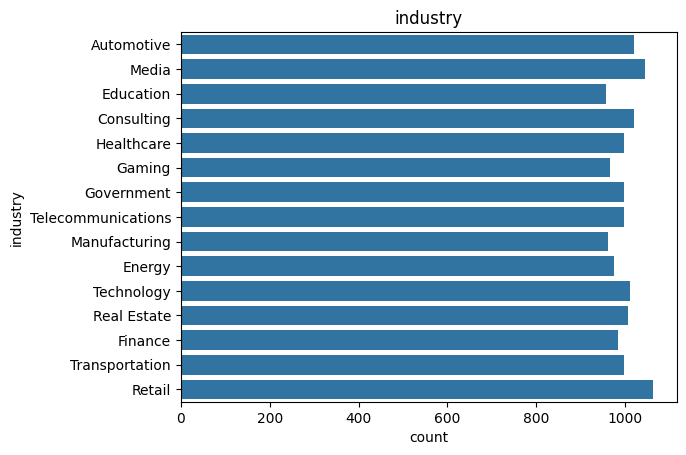

posting_date
2024-07-05    51
2024-04-08    51
2024-08-25    49
2025-04-05    46
2024-03-01    44
              ..
2025-03-24    19
2024-02-10    18
2025-03-12    18
2024-09-15    15
2024-12-19    14
Name: count, Length: 486, dtype: int64


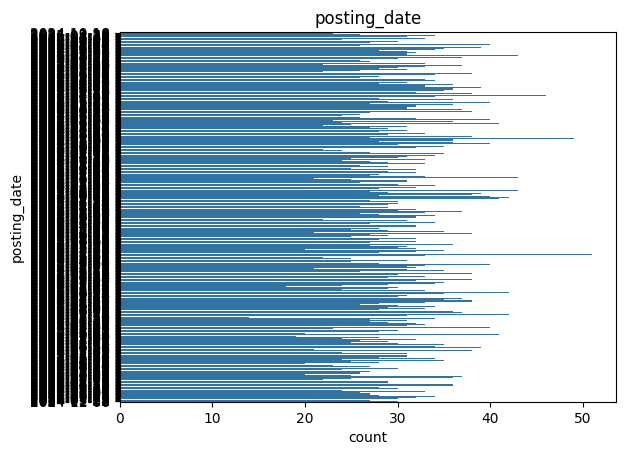

application_deadline
2025-01-05    47
2024-12-28    46
2025-04-07    45
2025-01-04    44
2024-08-27    44
              ..
2024-01-23     2
2024-01-21     1
2025-07-11     1
2024-01-16     1
2025-07-07     1
Name: count, Length: 543, dtype: int64


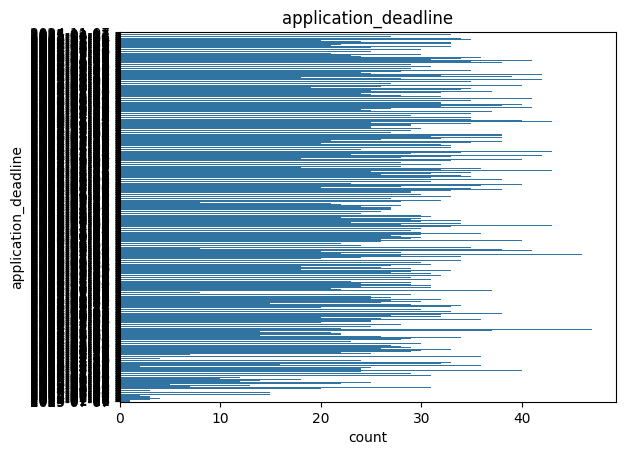

company_name
TechCorp Inc                  980
Cognitive Computing           972
AI Innovations                964
Digital Transformation LLC    961
Quantum Computing Inc         960
Future Systems                960
Cloud AI Solutions            951
Predictive Systems            947
Smart Analytics               927
Advanced Robotics             925
Neural Networks Co            922
Machine Intelligence Group    922
Autonomous Tech               918
DataVision Ltd                909
DeepTech Ventures             897
Algorithmic Solutions         885
Name: count, dtype: int64


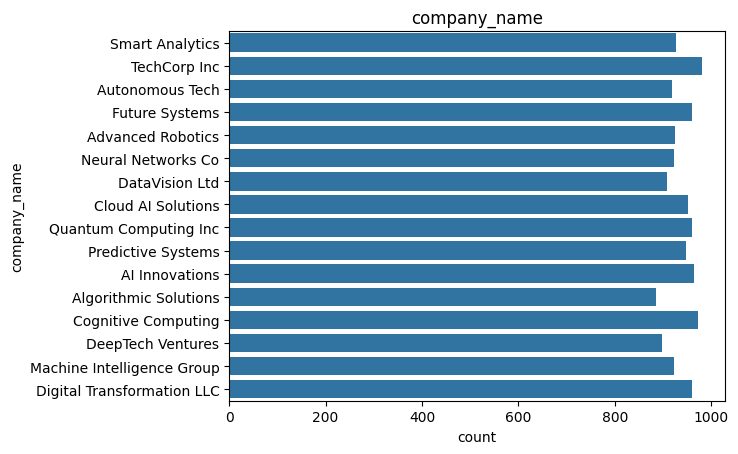

In [10]:
for col in AI.select_dtypes(include='object').columns:
    print(AI[col].value_counts())
    sns.countplot(y=AI[col])
    plt.title(col)
    plt.show()


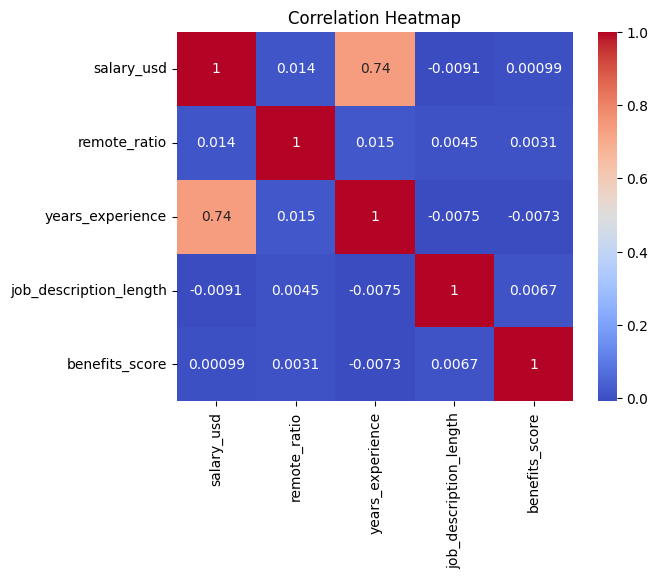

In [11]:
sns.heatmap(AI.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
le = LabelEncoder()
for col in AI.select_dtypes(include='object').columns:
    AI[col] = le.fit_transform(AI[col])

In [18]:
X = AI.drop("salary_currency", axis=1)  # Replace 'target' with actual target column name
y = AI["salary_currency"]

In [23]:
# Drop the 'job_id' column as it is an identifier and not a feature
# Drop the target column from the features
X = AI.drop(["job_title", "salary_currency"], axis=1)
y = AI["salary_currency"]

# Apply Label Encoding to remaining object type columns in X
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    # Check if the column still contains object types after dropping job_id
    # and before splitting
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Now proceed with splitting into X and y and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before scaling, verify dtypes in X_train
print("Data types in X_train before scaling:")
print(X_train.dtypes)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data types in X_train before scaling:
salary_usd                  int64
experience_level            int64
employment_type             int64
company_location            int64
company_size                int64
employee_residence          int64
remote_ratio                int64
required_skills             int64
education_required          int64
years_experience            int64
industry                    int64
posting_date                int64
application_deadline        int64
job_description_length      int64
benefits_score            float64
company_name                int64
dtype: object


In [24]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [25]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7756666666666666
[[   0    0  456]
 [   0    6  126]
 [   0   91 2321]]
              precision    recall  f1-score   support

         EUR       0.00      0.00      0.00       456
         GBP       0.06      0.05      0.05       132
         USD       0.80      0.96      0.87      2412

    accuracy                           0.78      3000
   macro avg       0.29      0.34      0.31      3000
weighted avg       0.65      0.78      0.70      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [27]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
[[ 456    0    0]
 [   0  132    0]
 [   0    0 2412]]
              precision    recall  f1-score   support

         EUR       1.00      1.00      1.00       456
         GBP       1.00      1.00      1.00       132
         USD       1.00      1.00      1.00      2412

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train) # X_train and y_train are now defined
y_pred_rf = rf.predict(X_test)

In [29]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9936666666666667
[[ 437    0   19]
 [   0  132    0]
 [   0    0 2412]]
              precision    recall  f1-score   support

         EUR       1.00      0.96      0.98       456
         GBP       1.00      1.00      1.00       132
         USD       0.99      1.00      1.00      2412

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Label Encoding to the target variable y_train and y_test
# XGBoost requires the target variable to be numerically encoded.
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestClassifier
# Using scaled data for models that benefit from it, like Logistic Regression and possibly others
# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train_scaled, y_train)
# y_pred_rf = rf.predict(X_test_scaled)

# Initialize and train the XGBoostClassifier
# Ensure the target is numerically encoded as done above
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train) # Fit with scaled X_train and encoded y_train
y_pred_xgb = xgb.predict(X_test_scaled) # Predict with scaled X_test

# You can uncomment the RandomForestClassifier training and prediction if you still want to evaluate it here
# If you do, make sure to use the scaled data (X_train_scaled, X_test_scaled) if you want consistent processing,
# although tree-based models are less sensitive to feature scaling.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:06:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0
[[ 456    0    0]
 [   0  132    0]
 [   0    0 2412]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00      2412

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

